In [16]:
import pandas as pd
from tqdm import trange
from tqdm import tqdm
import tweepy
import pickle
import networkx as nx 

In [17]:
df_congress_tweets = pd.read_pickle('../Data/Processed/congress.pkl')
df_congress_tweets.shape

(1637891, 10)

In [18]:
# Getting handles
medias = pd.read_table('../Data/Raw/LargestMedia.csv', sep=';')
twitter_handles = pd.read_table('../Data/Processed/Twitter_Handles_updated.csv', sep = ',')

In [19]:
medias['State'] = None
medias['Party'] = None
medias['Type'] = 'Media'
medias.rename(columns={'Twitter name': 'Twitter', 'Media': 'Name'}, inplace=True)

In [20]:
Data_Full = pd.concat([twitter_handles, medias])

In [21]:
Data_Full

,Twitter,State,Party,Type,Name,twitter_display_name
0,JeffFlake,AZ,Republican,Senator,Jeff Flake,Jeff Flake
1,SenJonKyl,AZ,Republican,Senator,Jon Kyl,U.S. Senator Jon Kyl
2,reppeteaguilar,CA,Democrat,Representative,Peter Aguilar,Rep. Pete Aguilar
3,repcardenas,CA,Democrat,Representative,Tony Cardenas,Rep. Tony Cárdenas
4,DarrellIssa,CA,Republican,Representative,Darrell Issa,Darrell Issa
...,...,...,...,...,...,...
11,thehill,None,None,Media,The Hill,The Hill
12,politico,None,None,Media,POLITICO,POLITICO
13,WSJ,None,None,Media,The Wall Street Journal,The Wall Street Journal
14,TheEconomist,None,None,Media,The Economist,The Economist


In [22]:
df_retweets = df_congress_tweets[df_congress_tweets['retweet'].isin(Data_Full.Twitter)]
df_retweets.head()

,user_id,user_name,id,created_at,text,retweet,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id
3,13218102,Senator John Cornyn,824406811226832897,2017-01-26 00:01:15,I was proud to join @marcorubio and @JohnCorny...,SenToddYoung,58,0,NaN,NaN
17,29501253,Adam Schiff,824411350420127745,2017-01-26 00:19:17,Executive orders to break up families in Calif...,KamalaHarris,757,0,NaN,NaN
35,242555999,Sheldon Whitehouse,824417422610460672,2017-01-26 00:43:25,Torture is immoral and ineffective. An executi...,SenJackReed,105,0,NaN,NaN
200,2863006655,Brenda Lawrence,824598117857292290,2017-01-26 12:41:26,A day that I will always remember. #tbt #resis...,RepBonnie,12,0,NaN,NaN
213,231510077,Joaquin Castro,824608733456138243,2017-01-26 13:23:37,Chaffetz: I’m looking into Trump D.C. hotel le...,politico,117,0,NaN,NaN


In [23]:
df_retweets = pd.DataFrame(data = 0, index = Data_Full['Name'], columns = Data_Full['Name'])

In [39]:
for idx, retweet in tqdm(retweets_pd.iterrows(), total=len(retweets_pd)):
    
    retweeter = retweet['user_name']
    original_poster = retweet['retweet'] 

    retweeter_name = Data_Full[Data_Full['twitter_display_name'] == retweeter]['Name'].values[0]
    original_poster_name = Data_Full[Data_Full['Twitter'] == original_poster]['Name'].values[0]

    df_retweets.loc[retweeter_name, original_poster_name] += 1

100%|██████████| 72318/72318 [01:46<00:00, 675.96it/s]


In [40]:
# Create graph
G = nx.from_numpy_matrix(df_retweets.values, create_using=nx.DiGraph())

# Because we use numpy, labels need to be reset
label_mapping = {idx: val for idx, val in enumerate(df_retweets.columns)}
G = nx.relabel_nodes(G, label_mapping)

In [46]:
G.edges.data("weight")

son Lee', 2), ('Denny Heck', 'Colin Allred', 2), ('Denny Heck', 'Marc Veasey', 2), ('Denny Heck', 'Tim Kaine', 4), ('Denny Heck', 'Robert C. Scott', 2), ('Denny Heck', 'Don Beyer', 2), ('Denny Heck', 'Gerald E. “Gerry” Connolly', 2), ('Denny Heck', 'Patty Murray', 8), ('Denny Heck', 'Maria Cantwell', 8), ('Denny Heck', 'Suzan DelBene', 2), ('Denny Heck', 'Rick Larsen', 2), ('Denny Heck', 'Derek Kilmer', 8), ('Denny Heck', 'Adam Smith', 4), ('Denny Heck', 'Denny Heck', 4), ('Denny Heck', 'Mark Pocan', 2), ('Denny Heck', 'ABC News', 4), ('Denny Heck', 'CNN', 10), ('Denny Heck', 'MSNBC', 2), ('Denny Heck', 'The Hill', 2), ('Joe Manchin', 'Heidi Heitkamp', 2), ('Joe Manchin', 'Dean Heller', 2), ('Joe Manchin', 'Susan Collins', 2), ('Joe Manchin', 'Kevin Cramer', 2), ('Joe Manchin', 'Patrick Toomey', 4), ('Joe Manchin', 'Mike Rounds', 2), ('Joe Manchin', 'Joe Manchin', 2), ('Joe Manchin', 'Shelley Moore Capito', 2), ('Joe Manchin', 'ABC News', 2), ('Joe Manchin', 'CBS News', 2), ('Shelley M

<AxesSubplot:xlabel='Name'>

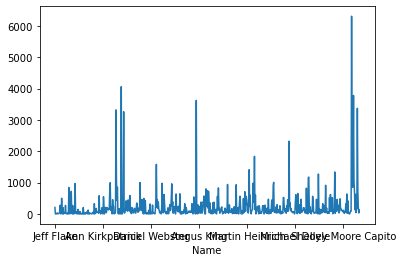

In [58]:
df_retweets.sum(axis = 0).plot()